## Analysis of beta-values output by glmdenoise, 2014 imagery.rf data


### Info
BASIC STRUCTURE OF STUDY:  
3 subjects  
8 different types of design matrices x (percieved or imagined) = 16   
each of the 8 has it's own set of 8 pictures, shown in 8 locations   

16 x 8 x 8 = 1024 max conditions 
(only TN has this many, others are missing a couple)

*********************************************************************

#### BETA WEIGHTS  (1 for ea subj)  
##### with z-score
path = /musc.repo/Data/jesse/imagery_RF/brainthresh99_0_05_with_Zscore/betas/  
file = SUBJ_all_runs_BETAs_w_zscore.mat  
#### no z-score
path = /musc.repo/Data/jesse/imagery_RF/brainthresh99_0_05_withOUT_Zscore/betas/  
file = SUBJ_all_runs_BETAs_no_zs.mat  


#### CONDITION NAMES (1 for ea subj; width matches beta weight matrix)   
structure: <'type_of_run/pic_category/pic_name/pic_location'>  
path = /musc.repo/Data/jesse/imagery_RF/brainthresh99_0_05/all_data/condit_names
file name = **_condit_name.mat

#### INDICES TO TURN VECTORS INTO BRAIN SHAPES  
path = /home/breedlov/musc.repo/Data/jesse/imagery_RF  
file name = vect2brain.m  

#### COUNT OF PCs REMOVED (2 rows, 1st row gives a # of pcs removed, 2nd row gives how many runs for a subj had that many removed)   
path = /musc.repo/Data/jesse/imagery_RF/brainthresh99_0_05/all_data/pcs_removed  
file name = **_pcremoved_count.mat

#### HISTOGRAMS of SNR before vs after GLM-denoise   
path = /musc.repo/Data/jesse/imagery_RF/brainthresh99_0_05/all_data/SNR_plots   
file name = **_2pcp_1vols_split_151021_SNR_plots.png  

#### NUMBER OF PCs REMOVED (width matches beta weight matrix; one # for every run, repeated for every condition of run)  
path = /musc.repo/Data/jesse/imagery_RF/brainthresh99_0_05/all_data/pcs_removed  
file name = **_all_runs_pcs_removed_matrix.mat  

#### ALL OUTPUT GLMDENOISE  
path = /internal/study_data/img_RF/GLM_testing/all_subjects_all_runs/brainthresh99_0_05  
1 folder for every run (~45 runs)  
includes denoised-data, results, & reconstructed brains niftis for SNR, betas, noise pool, etc  




In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import nibabel as nib
import os
from glob import glob
from PIL import Image
from imagery_rf_field.src.glmd_betas import *
from os.path import join
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Some code for reading and organizing the data in .mat files
neural = (voxels) x (condition1,...,conditionT,cooridnates,SNR)  
stim = (condition1,...,conditionT) x (run,category,object_name,image_filename)



In [2]:
# def load_mask_from_nii(mask_nii_file):
#     return nib.load(mask_nii_file).get_data()

# def load_betas_from_mat_file(beta_mat_file):
#     return pd.DataFrame(loadmat(beta_mat_file)['all_runs_matrix'])


# def get_file_name_for_each_stim(row, stim_path):
#     location_dict = {'north':0, 'west':1, 'southwest':2, 'northwest':3, 'east':4, 'south':5, 'northeast':6, 'southeast':7}
#     stim_loc = os.path.join(stim_path,'imagery_%0.3d' %(int(row['run'][0])))
#     stim_names = glob(os.path.join(stim_loc,'*.png'))
#     stim_names = map(os.path.basename,stim_names)
#     parts = map(lambda x: x.split('.'), stim_names)
#     img_number=None
#     for p in parts:
# #         print '==='
# #         print row['category']
# #         print p[0]
# #         print row['object_name']
# #         print str(p[1]).replace(',','_')
# #         print str(p[1]).replace(' ','_')
# #         print '==='
#         nm = str(p[1].replace(',','_'))
#         nm = nm.replace(' ','_')
#         if (row['category']==p[0]) & (row['object_name']==nm):
#             img_name = os.path.join(os.path.join(stim_loc,'frame_files'),
#                                     '.'.join([p[3],
#                                              p[2],
#                                              '%0.2d' %(location_dict[row['location']]),
#                                              'image',
#                                              'png']))
#     return img_name

# def load_stim_from_mat_file(stim_mat_file,stim_loc):
#     df = pd.DataFrame(data = map(lambda x: x.split('/'),
#                                  [c[0] for c in loadmat(stim_mat_file)['all_cur_subj_condits'][0]]),
#                       columns=['run', 'category', 'object_name', 'location'])
#     df['image_name'] = df.apply(lambda row: get_file_name_for_each_stim(row, stim_loc),axis=1)
#     return df
    

In [3]:
# class imagery_rf_dataset(object):
#     def __init__(self, subject, beta_data_frame, stim_data_frame, mask, order = 'F'):
#         self.betas = beta_data_frame
#         self.stim  = stim_data_frame
#         self.mask = mask
#         self.subject = subject
#         self.shape = mask.shape
#         self.order = order
    
#     def view_betas(self,condition_indices,save_to = None, mean=False):
#         beta_vol = np.zeros(self.mask.shape+(len(condition_indices),),order=self.order)
#         for ii,beta in enumerate(condition_indices):
#             cur = self.mask.ravel(order=self.order).copy()
#             cur[cur > 0] = self.betas.loc[:,beta]
#             beta_vol[:,:,:,ii]=cur.reshape(self.shape,order=self.order)
#         if mean:
#             beta_vol = np.mean(beta_vol,axis=3)
        
#         if save_to:
#             nib.save(nib.Nifti1Image(beta_vol,affine=np.eye(4)),save_to)
#         else:
#             return beta_vol
    
#     def get_condition_stimuli(self, condition_index,output='numpy',image_size=False):       
#         try:
#             img = Image.open(self.stim_df.iloc[condition_index,'image_name']).resize(image_size)
#         except:
#             img = Image.open(self.stim_df.iloc[stim_dx,'image_name'])
#         if output == 'numpy':
#             img = np.array(img)
#         return img  
    
#     def get_stimuli_with(self,stim_col,col_contains):
#         '''
#         get_stimuli_with(stim_col,col_contains)
#         returns index of all stimuli with "col_contains" in the stim_column
#         example: all imagery runs = get_stimuli_with('run', 'img')
#         '''
#         n_stim = self.stim.shape[0]
#         row_func = lambda row: col_contains in row
#         return self.stim.loc[self.stim[stim_col].apply(row_func),:]
    
#     def run_wise_z_score(self,in_place=False):        
#         zscore = lambda row: (row - row.mean()) / row.std()
#         if not in_place:
#             z_score_df = self.betas.copy()
#         else:
#             z_score_df = self.betas
#         runs = self.stim.groupby(by=['run'])
#         for name,grp in runs:
#             idx = self.get_stimuli_with('run',name).index           
#             z_score_df.iloc[:,idx]= z_score_df.iloc[:,idx].apply(zscore,axis=1)
#         if not in_place:
#             return z_score_df

In [4]:
saving_spot = '/media/tnaselar/Data/scratch/'

In [5]:
####with z-score
# beta_path = '/musc.repo/Data/jesse/imagery_RF/brainthresh99_0_05_with_Zscore/betas/'
# file_exp = '%s_all_runs_BETAs_w_zscore.mat'

####withOUT z-score
# beta_path = '/musc.repo/Data/jesse/imagery_RF/brainthresh99_0_05_withOUT_Zscore/betas/'
# file_exp = '%s_all_runs_BETAs_no_zs.mat'

####jesse's pipeline
beta_path = '/musc.repo/Data/jesse/imagery_RF/glmd_new_preproc_undistort_slicetime/after_fnirt/betas/'#'/media/tnaselar/Data/imagery_rf.2014/betas/'
file_exp = '%s_all_runs_BETAs_canonicalHRF.mat'

In [6]:

subject = 'GSY'

stim_loc = '/musc.repo/mri/7T.cmrr/Presentation/imagery.rf.7T.July.2014/'
cond_file_path = '/musc.repo/Data/jesse/imagery_RF/glmd_new_preproc_undistort_slicetime/condit_names/%s_condit_names.mat' %(subject)

mask_path = '/musc.repo/Data/jesse/imagery_RF/glmd_new_preproc_undistort_slicetime/brain_masks/%s_mean_func_brain_mask.nii.gz' %(subject)

#'/media/tnaselar/Data/imagery_rf.2014/masks/%s_mask.nii.gz' 

In [7]:
beta_df = load_betas_from_mat_file(join(beta_path,file_exp) %(subject))
stim_df = load_stim_from_mat_file(cond_file_path,stim_loc)
mask = load_mask_from_nii(mask_path)

In [8]:
print 'volume dimensions: %s' %(mask.shape,)
print 'number of voxels: %d' %(np.sum(mask))

volume dimensions: (100, 100, 52)
number of voxels: 111481


In [9]:
fMRI = imagery_rf_dataset(subject, beta_df, stim_df, mask)

In [10]:
fMRI.stim.head(8*8)

,run,category,object_name,location,image_name
0,1img,vehicle,fire_truck,north,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
1,1img,bird,birds,southeast,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
2,1img,few_humans,baby,east,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
3,1img,few_humans,baby,west,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
4,1img,few_humans,baby,southwest,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
5,1img,many_humans,audience,south,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
6,1img,part_of_building,building,east,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
7,1img,few_humans,baby,northeast,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
8,1img,bird,birds,southwest,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
9,1img,many_humans,audience,northeast,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...


In [11]:
fMRI.get_stimuli_with('category', 'vehicle')

,run,category,object_name,location,image_name
0,1img,vehicle,fire_truck,north,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
17,1img,vehicle,fire_truck,southwest,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
19,1img,vehicle,fire_truck,west,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
22,1img,vehicle,fire_truck,southeast,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
35,1img,vehicle,fire_truck,south,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
37,1img,vehicle,fire_truck,northwest,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
40,1img,vehicle,fire_truck,east,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
58,1img,vehicle,fire_truck,northeast,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
64,1pcp,vehicle,fire_truck,north,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...
81,1pcp,vehicle,fire_truck,southwest,/musc.repo/mri/7T.cmrr/Presentation/imagery.rf...


In [12]:
img = fMRI.get_condition_stimuli(0, image_size=(256,256))

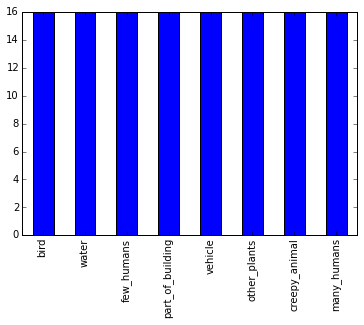

In [13]:
fMRI.stim['category'].value_counts().plot(kind='bar')

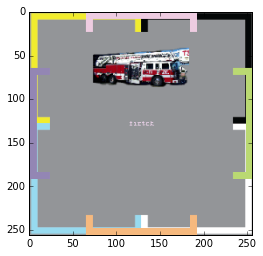

In [14]:
plt.imshow(img)

In [15]:
img_idx = fMRI.get_stimuli_with('run','img').index
pcp_idx = fMRI.get_stimuli_with('run','pcp').index

In [16]:
fMRI.view_betas(img_idx, save_to = saving_spot+'img_mean_'+subject, mean=True)

In [17]:
print np.sum(fMRI.mask.ravel())
print fMRI.betas.shape

111481
(111481, 128)


In [18]:
fMRI.view_betas(pcp_idx, save_to = saving_spot+'pcp_mean_'+subject, mean=True)

In [19]:
fMRI.view_betas(img_idx, save_to = saving_spot+'img_timeseries'+subject, mean=False)

In [20]:
fMRI.view_betas(pcp_idx, save_to = saving_spot+'pcp_timeseries'+subject, mean=False)

In [21]:
pcp_b = fMRI.view_betas(pcp_idx, mean=True)

In [22]:
img_b = fMRI.view_betas(img_idx, mean=True)

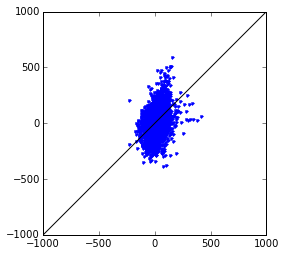

In [23]:
rng = np.linspace(-1000, 1000, 100)
plt.plot(pcp_b.ravel(), img_b.ravel(), '.')
plt.plot(rng, rng, 'k')
plt.axes().set_aspect(1)